In [1]:
"""This is my 2nd data analysis notebook"""

'This is my 2nd data analysis notebook'

In [7]:
"""Imports"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("properties_working.csv")

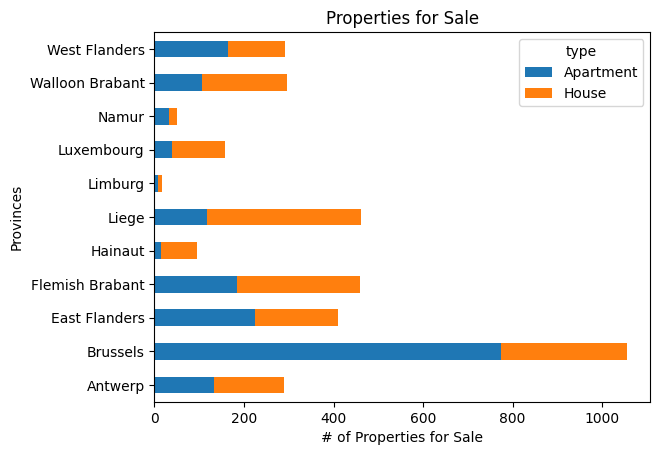

In [125]:
df.groupby(["province","type"]).size().unstack().plot(kind="barh", stacked=True)
plt.xlabel("# of Properties for Sale")
plt.ylabel("Provinces")
plt.title("Properties for Sale")
plt.show()

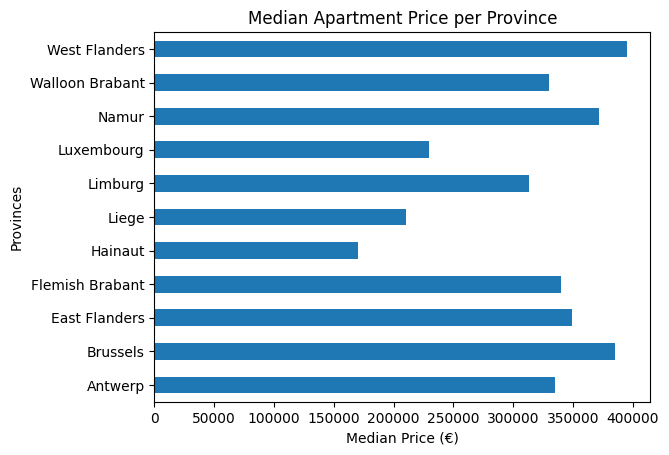

In [126]:
df_Apt = df.loc[df["type"] == "Apartment"]
df_Apt.groupby("province")["price"].median().plot(kind="barh")
plt.xlabel("Median Price (€)")
plt.ylabel("Provinces")
plt.title("Median Apartment Price per Province")
plt.show()

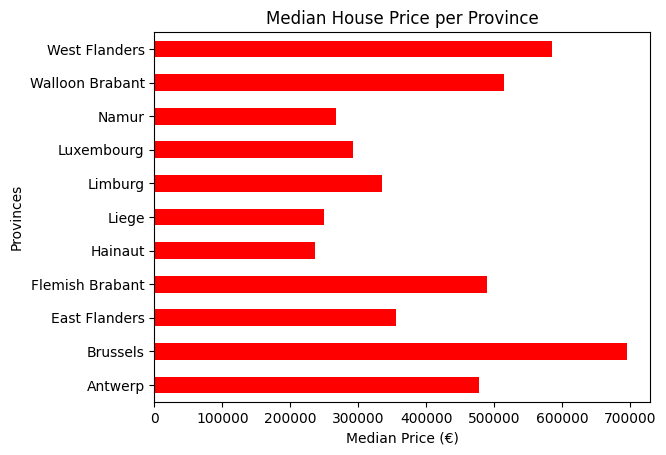

In [127]:
df_House = df.loc[df["type"] == "House"]
df_House.groupby("province")["price"].median().plot(kind="barh", color="red")
plt.xlabel("Median Price (€)")
plt.ylabel("Provinces")
plt.title("Median House Price per Province")
plt.show()

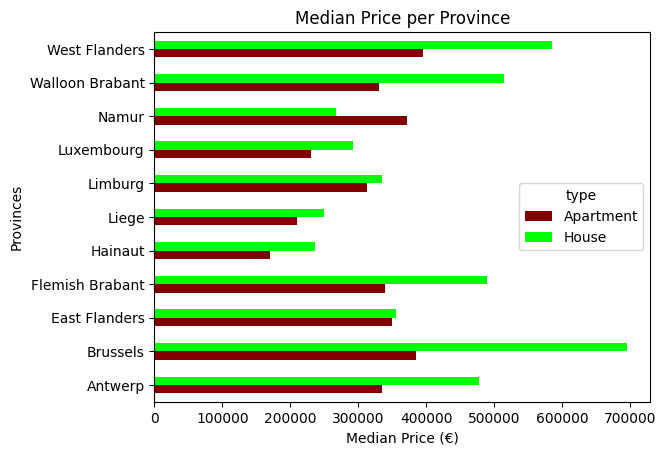

In [193]:
df.groupby(["province","type"])["price"].median().unstack().plot(kind="barh", color={"Apartment":"maroon", "House":"lime"})
plt.xlabel("Median Price (€)")
plt.ylabel("Provinces")
plt.title("Median Price per Province")
plt.show()

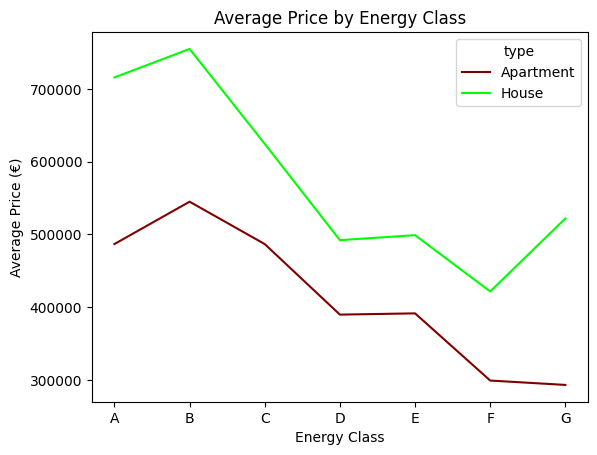

In [194]:
df_eC = df.loc[df["energyClass"] != "None"]
df_eC.groupby(["energyClass","type"])["price"].mean().unstack().plot(color={"Apartment":"maroon", "House":"lime"})
plt.xlabel("Energy Class")
plt.ylabel("Average Price (€)")
plt.title("Average Price by Energy Class")
plt.show()

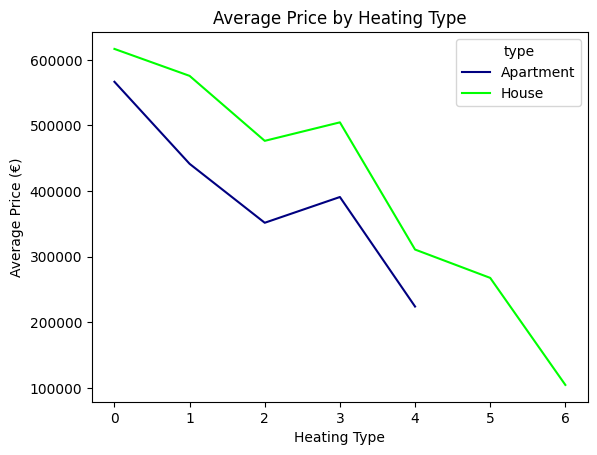

In [192]:
df_hT = df.loc[df["heatingType"] != "None"]
df_eC.groupby(["heatingType","type"])["price"].mean().unstack().plot(color={"Apartment":"navy", "House":"lime"})
plt.xlabel("Heating Type")
plt.ylabel("Average Price (€)")
plt.title("Average Price by Heating Type")
plt.show()